#  SVM (Support Vector Machines)


# IMPORT

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("C:\\Users\\sivas\\OneDrive\\Desktop\\Coursera\\IBM\\Machine learning\\cell_samples.csv")

# EXPLORE 

In [6]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


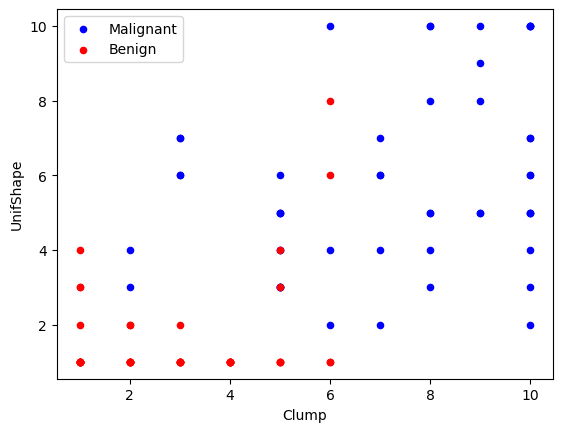

In [7]:
import matplotlib.pyplot as plt
ax0=df[df['Class']==4][0:50].plot(x='Clump',y='UnifShape',kind='scatter',color='b',label='Malignant');
ax1=df[df['Class']==2][0:50].plot(x='Clump',y='UnifShape',kind='scatter',color='red',label='Benign',ax=ax0);
plt.show()

In [8]:
df.dtypes # BareNuc column have some non-numerical or categorical values so we should drop these rows

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

DATA PREPROCESSING

In [9]:
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')

In [10]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [11]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [12]:
import numpy as np
features=df[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X=np.asarray(features)

In [13]:
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [14]:
y=np.asarray(df['Class'])

In [15]:
type(y)

numpy.ndarray

In [16]:
type(X)

numpy.ndarray

In [17]:
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

# train_test_split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(546, 9) (546,)
(137, 9) (137,)


# Building SVM with scikitlearn library

In [108]:
from sklearn import svm

In [106]:
svm=svm.SVC(kernel='rbf')

In [76]:
svm.fit(X_train,y_train)

SVC()

In [78]:
yhat=svm.predict(X_test)

In [80]:
yhat[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

In [82]:
y_test[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

# Evaluation

In [85]:
from yellowbrick.classifier import ConfusionMatrix

0.9635036496350365

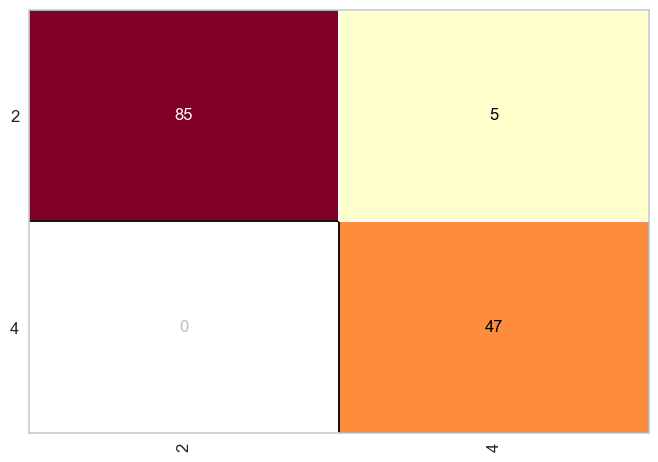

In [87]:
cm=ConfusionMatrix(svm)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [93]:
from sklearn.metrics import f1_score

In [95]:
f1_score(y_test,yhat,average='weighted')

0.9639038982104676

In [97]:
from sklearn.metrics import jaccard_score

In [99]:
jaccard_score(y_test,yhat,pos_label=2)

0.9444444444444444

# Practice

In [110]:
svm1=svm.SVC(kernel='linear')

In [112]:
svm1.fit(X_train,y_train)

SVC(kernel='linear')

In [114]:
yh=svm1.predict(X_test)

In [116]:
yh[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

In [118]:
y_test[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

In [120]:
f1_score(y_test,yhat,average='weighted') # model performance / predictivity

0.9639038982104676

In [122]:
jaccard_score(y_test,yhat,pos_label=2) #The Jaccard index, also known as the Jaccard similarity coefficient,
                                        #is a statistic used for gauging the similarity and diversity of sample sets.

0.9444444444444444

In [125]:
import itertools

In [135]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


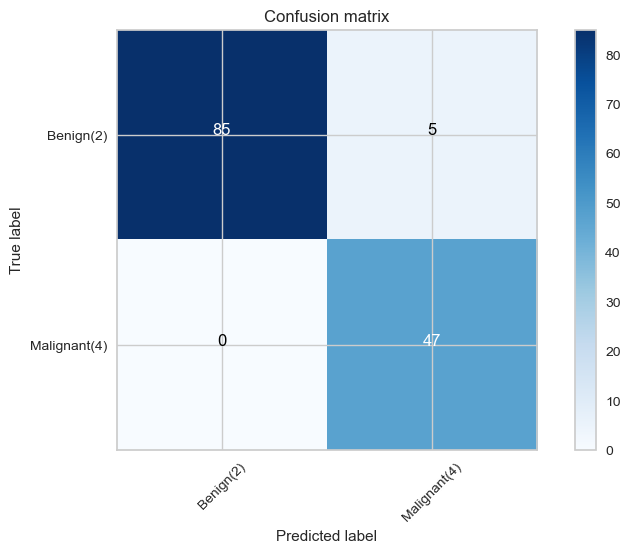

In [137]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2) # only 2 decimal printed

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')